
# Script to illustrate polygonization process



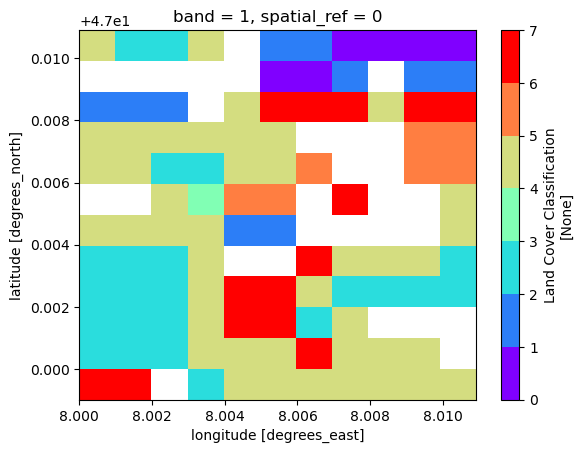

In [2]:
import rasterio
from rasterio.features import shapes
from rasterio.windows import from_bounds
import geopandas as gpd
from tqdm import tqdm
from tqdm import tqdm
from src.data_processing.utils_landcover import CopernicusDataset
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
import rasterio
import numpy as np

connectivity = 4
dataset = CopernicusDataset()
extent = (8., 47., 8.01, 47.01)


fig, ax = plt.subplots()

with rioxarray.open_rasterio(dataset.raster_file, mask_and_scale=True) as raster:    
    lc = raster.rio.clip_box(minx=extent[0], miny=extent[1], maxx=extent[2], maxy=extent[3])
    lc = lc.sel(band=1)
    
    # replacing number to have nicer colors
    for i,v in enumerate(np.unique(lc)):
        lc.values[lc.values==v] = i
    
    lc.plot(levels=len(np.unique(lc)), ax = ax, cmap="rainbow")
    


39it [00:00, 27966.81it/s]

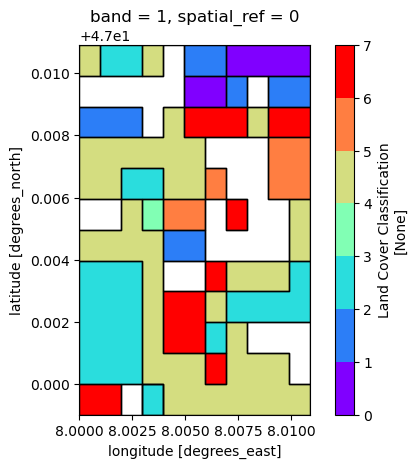

<Figure size 640x480 with 0 Axes>

In [3]:
current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()
    
geoms = []
band = lc.to_numpy().astype(np.int16)
for (s,v) in tqdm(shapes(band, mask=None, transform=lc.rio.transform(), connectivity=connectivity)):
    if dataset.is_land(v): 
        geoms.append({'properties': {'habitat_id': int(v)}, 'geometry': s})

geoms.append({'properties': {'habitat_id': int(v)}, 'geometry': s})

gdf = gpd.GeoDataFrame.from_features(geoms)
gdf.set_crs(lc.rio.crs,inplace=True)


# gdf.plot(ax = ax, column="habitat_id",)
gdf.plot(ax = ax, facecolor="None",)

# Later, you can set the axes to the stored extent
ax.set_xlim(current_xlim)
ax.set_ylim(current_ylim)
fig


Adding random occurences

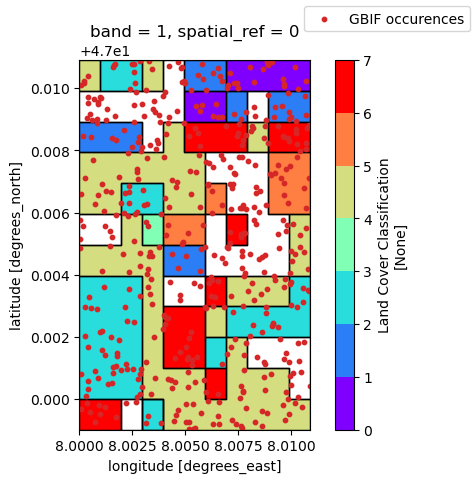

In [4]:
x = np.random.uniform(*current_xlim, 500)
y = np.random.uniform(*current_ylim, 500)
ax.scatter(x, y, c = "tab:red", s = 10, label = "GBIF occurences")
fig.legend()
fig

27it [00:00, 30271.64it/s]


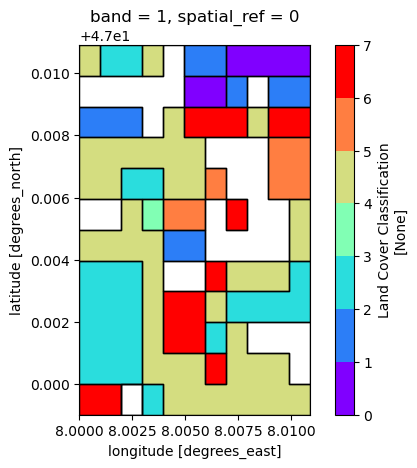

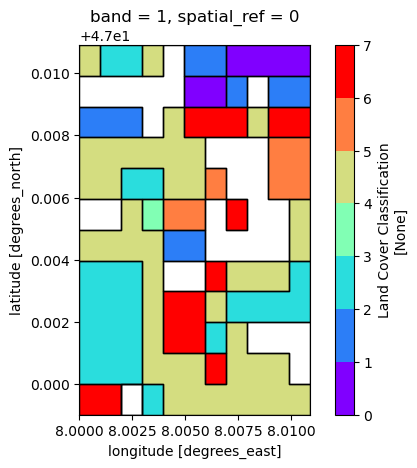

In [5]:

fig, ax = plt.subplots()

with rioxarray.open_rasterio(dataset.raster_file, mask_and_scale=True) as raster:    
    lc = raster.rio.clip_box(minx=extent[0], miny=extent[1], maxx=extent[2], maxy=extent[3])
    lc = lc.sel(band=1)
    
    # replacing number to have nicer colors
    for i,v in enumerate(np.unique(lc)):
        lc.values[lc.values==v] = i
    
    lc.plot(levels=len(np.unique(lc)), ax = ax, cmap="rainbow")
    
current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()
    
geoms = []
band = lc.to_numpy().astype(np.int16)
for (s,v) in tqdm(shapes(band, mask=None, transform=lc.rio.transform(), connectivity=8)):
    if dataset.is_land(v): 
        geoms.append({'properties': {'habitat_id': int(v)}, 'geometry': s})

geoms.append({'properties': {'habitat_id': int(v)}, 'geometry': s})

gdf = gpd.GeoDataFrame.from_features(geoms)
gdf.set_crs(lc.rio.crs,inplace=True)


# gdf.plot(ax = ax, column="habitat_id",)
gdf.plot(ax = ax, facecolor="None",)

# Later, you can set the axes to the stored extent
ax.set_xlim(current_xlim)
ax.set_ylim(current_ylim)
fig